<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QuantumGates_RCCXGate_QiskitAerSimulator_mkbahk_20241015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.3.1
#%pip install qiskit_ibm_runtime=='0.30.0'
%pip install qiskit_aer==0.16.0
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=8a9ea3971da3e80ff2ef314c72c41215876d91db75cc2552f5fbaff1f04e9fa5
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 35.7 MB/s eta 0:00:00
  Cloning https://github.com/qis

In [2]:
%pip show qiskit qiskit_aer

Name: qiskit
Version: 1.3.1
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
---
Name: qiskit-aer
Version: 0.16.0
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [3]:
from qiskit_aer import AerSimulator
backend = AerSimulator(method="statevector") # 'automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop'
print(backend)

AerSimulator('aer_simulator_statevector')


In [4]:
print(backend.configuration().basis_gates)

['ccx', 'ccz', 'cp', 'crx', 'cry', 'crz', 'cswap', 'csx', 'cu', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'diagonal', 'ecr', 'h', 'id', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcx_gray', 'mcy', 'mcz', 'multiplexer', 'p', 'pauli', 'r', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'store', 'swap', 'sx', 'sxdg', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z', 'break_loop', 'continue_loop', 'delay', 'for_loop', 'if_else', 'initialize', 'kraus', 'qerror_loc', 'quantum_channel', 'reset', 'roerror', 'save_amplitudes', 'save_amplitudes_sq', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_probabilities', 'save_probabilities_dict', 'save_state', 'save_statevector', 'save_statevector_dict', 'set_statevector', 'switch_case', 'while_loop']



# RCCX Gate
* Barrier Gate는 양자 회로에서 **논리적 경계(logical 세 큐비트 연산을 수행하는 제어된 회전 게이트 중 하나로, 제어된 Toffoli Gate 또는 회전된 Toffoli Gate로 간주
* 세 큐비트 중 두 큐비트를 제어 큐비트로 사용하고 나머지 하나를 타겟 큐비트로 하여 연산을 수행
* Toffoli Gate는 두 제어 큐비트가 모두 ∣1⟩ 상태일 때 타겟 큐비트를 반전시키는 X-Gate임
* Toffoli Gate와 동일한 논리적 기능을 수행하지만, 회로 깊이를 줄이고 실용성을 높이기 위해 추가적인 회전 연산을 포함함





In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import math

RCCXGateCircuit = QuantumCircuit(3, 3)
RCCXGateCircuit.rccx(0, 1, 2)

In [7]:
from qiskit.quantum_info import Operator
unitary = Operator(RCCXGateCircuit)
print(unitary)

Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.-1.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+1.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


In [8]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(unitary)

<IPython.core.display.Latex object>

In [21]:
qc = QuantumCircuit(3, 3)
qc.x(0)
qc.x(1)
qc.rccx(0, 1, 2)
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

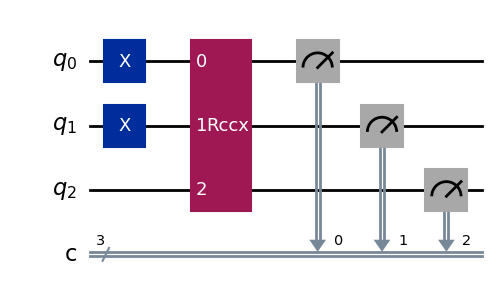

In [22]:
qc.draw(output='mpl')

In [26]:
job = backend.run(qc, shots=1024)
result = job.result()

AerError: 'unknown instruction: rccx'

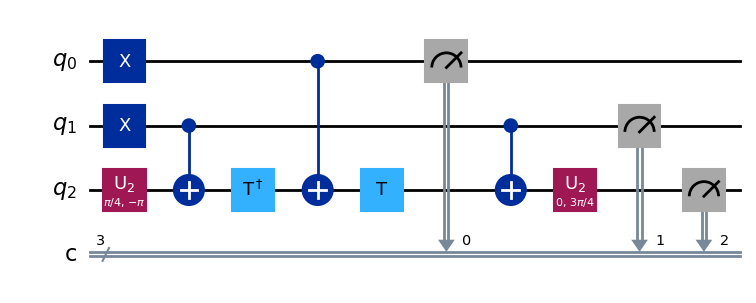

In [25]:
from qiskit import transpile
tc = transpile(qc, backend)
tc.draw(output="mpl")

In [29]:
job = backend.run(tc, shots=1024)
result = job.result()

In [30]:
result

Result(backend_name='aer_simulator_statevector', backend_version='0.16.0', qobj_id='', job_id='a2c7abca-b238-46e0-ba35-560310a74891', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x7': 1024}), header=QobjExperimentHeader(creg_sizes=[['c', 3]], global_phase=0.0, memory_slots=3, n_qubits=3, name='circuit-175', qreg_sizes=[['q', 3]], metadata={}), status=DONE, seed_simulator=1516965689, metadata={'time_taken': 0.028292756, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 3, 'sample_measure_time': 0.008230885, 'active_input_qubits': [0, 1, 2], 'num_clbits': 3, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'th

In [31]:
result.results

[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x7': 1024}), header=QobjExperimentHeader(creg_sizes=[['c', 3]], global_phase=0.0, memory_slots=3, n_qubits=3, name='circuit-175', qreg_sizes=[['q', 3]], metadata={}), status=DONE, seed_simulator=1516965689, metadata={'time_taken': 0.028292756, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 3, 'sample_measure_time': 0.008230885, 'active_input_qubits': [0, 1, 2], 'num_clbits': 3, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}, time_taken=0.028292756)]

In [32]:
result.results[0].data.counts

{'0x7': 1024}

In [33]:
result.get_counts()

{'111': 1024}

In [34]:
counts = result.get_counts()
print(counts)

{'111': 1024}


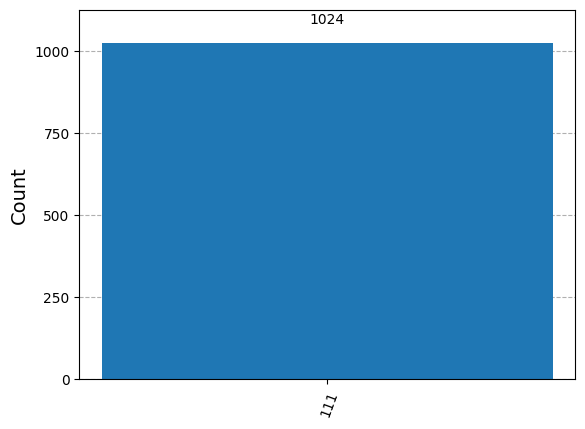

In [35]:
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector,plot_state_paulivec, plot_state_hinton, plot_state_qsphere
plot_histogram(counts)

In [38]:
qc2 = QuantumCircuit(3, 3)
#circuit2.reset(0)
qc2.x(0)
qc2.x(1)
qc2.rccx(0, 1, 2)


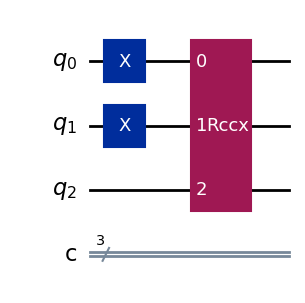

In [39]:
qc2.draw(output='mpl')

In [43]:
from qiskit.quantum_info import Statevector

psi = Statevector(qc2)

In [44]:
print(psi)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+1.j],
            dims=(2, 2, 2))


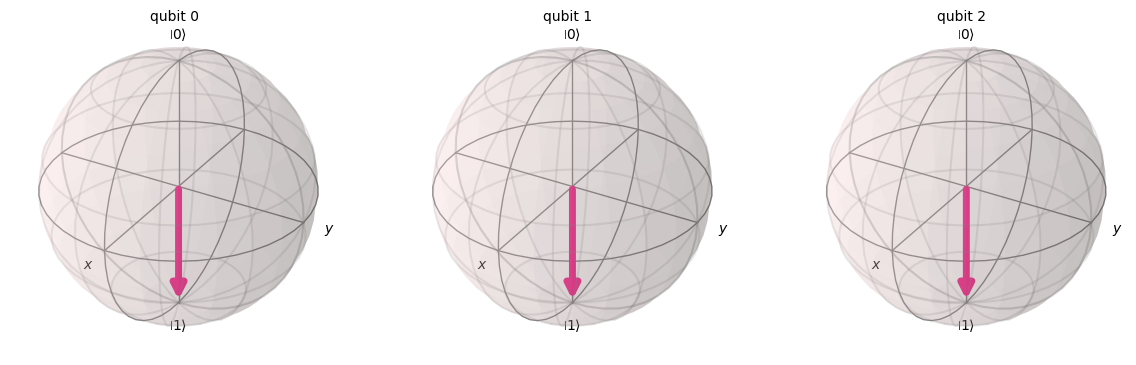

In [45]:
plot_bloch_multivector(state=psi)

In [ ]:
from qiskit.visualization import visualize_transition
visualize_transition(circuit2)
#20초 정도 걸려요

<ipython-input-29-34afa0788b4c>:2: DeprecationWarning: The function ``qiskit.visualization.transition_visualization.visualize_transition()`` is deprecated as of qiskit 1.2.0. It will be removed in the 2.0 release.
  visualize_transition(circuit2)


VisualizationError: 'Only one qubit circuits are supported'

In [ ]:
from qiskit_aer import Aer

# Aer 시뮬레이터 백엔드 목록 가져오기
backends = Aer.backends()

# 각 백엔드의 지원 basis gate 출력
print("Aer Simulators and Supported Basis Gates:\n")
for backend in backends:
    print(f"Backend: {backend.name}")
    print(f"Basis Gates: {backend.configuration().basis_gates}")
    print("-" * 50)

Aer Simulators and Supported Basis Gates:

Backend: aer_simulator
Basis Gates: ['ccx', 'ccz', 'cp', 'crx', 'cry', 'crz', 'cswap', 'csx', 'cu', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'diagonal', 'ecr', 'h', 'id', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcx_gray', 'mcy', 'mcz', 'multiplexer', 'p', 'pauli', 'r', 'roerror', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'store', 'swap', 'sx', 'sxdg', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z', 'break_loop', 'continue_loop', 'delay', 'for_loop', 'if_else', 'initialize', 'kraus', 'qerror_loc', 'quantum_channel', 'reset', 'roerror', 'save_amplitudes', 'save_amplitudes_sq', 'save_clifford', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_matrix_product_state', 'save_probabilities', 'save_probabilities_dict', 'save_stabilizer', 'save_state', 'save_statevector', 'save_statevector_dict', 'save_superop', 'save_unitary', 'set_density_matrix'